# Housing market analysis

data
1. [Median housing prices](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_indicadores&contecto=pi&indOcorrCod=0012248&selTab=tab0&xlang=en)
2. [CPI](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_indicadores&contecto=pi&indOcorrCod=0002384&selTab=tab0)
3. [Housing prices (1st, 2nd, and 3rd quartiles)](https://www.ine.pt/xportal/xmain?xpid=INE&xpgid=ine_destaques&DESTAQUESdest_boui=645849423&DESTAQUESmodo=2)


reading
* https://en.wikipedia.org/wiki/2010%E2%80%932014_Portuguese_financial_crisis
* https://ahouseinlisbon.com/en/housing-prices-in-portugal-over-the-last-6-years

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [265]:
src = 'data/1-median_housing.csv'

with open(src, mode='r', encoding='latin-1') as f:
    raw = f.read()

lines = raw.split('\n')
lines = [line.split(';') for line in lines]

data = lines[8:23]

df = pd.DataFrame(data)
df = df.T

# remove extra columns
df = df.drop(1, axis=1)
df = df.drop(3, axis=1)

# fill dates
df = df.replace('', None)
df[0] = df[0].ffill()

# set columns and index
df.iloc[0, :2] = ['time', 'build']

df.columns = df.loc[0]
df = df.drop(0, axis=0)

df = df.set_index(['time', 'build'])
df = df.dropna(axis=0, how='all')

df = df.replace('? ?', None)
df = df.astype(float)

cols = df.columns.str.split(':')
df.columns = cols.str[0]
geo_dict = {c[0] : c[1].strip() for c in cols}

df = df.reset_index()
df = df.pivot(index='time', columns='build', values=df.columns[2:])
df.index = pd.DatetimeIndex(df.index)
df = df.sort_index()

In [266]:
df

0               PT                       1                      11          \
build        Flats   Total  Villas   Flats   Total  Villas   Flats   Total   
time                                                                         
2011-01-01   925.0   877.0   794.0   920.0   871.0   780.0   739.0   728.0   
2011-02-01   938.0   887.0   800.0   931.0   880.0   785.0   749.0   734.0   
2011-03-01   949.0   898.0   809.0   943.0   890.0   792.0   759.0   740.0   
2011-04-01   950.0   900.0   818.0   945.0   894.0   804.0   764.0   752.0   
2011-05-01   933.0   889.0   814.0   929.0   882.0   802.0   750.0   743.0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2024-08-01  1850.0  1664.0  1297.0  1848.0  1667.0  1289.0  1567.0  1429.0   
2024-09-01  1882.0  1695.0  1301.0  1879.0  1696.0  1298.0  1600.0  1448.0   
2024-10-01  1920.0  1721.0  1317.0  1916.0  1723.0  1312.0  1632.0  1472.0   
2024-11-01  1944.0  1740.0  1320.0  1939.0  1742.0  1314.0  1661.0  1495.0   
2024-12-01  1962.0  1747.0  1322.0  1960.0  1750.0  1316.0  1681.0  1498.0   

0                      11A  ...     1A0 1A01106                       2  \
build       Villas   Flats  ...  Villas   Flats   Total  Villas   Flats   
time                        ...                                           
2011-01-01   711.0   782.0  ...  1210.0  1695.0  1705.0  2059.0   990.0   
2011-02-01   713.0   794.0  ...  1251.0  1736.0  1742.0  2325.0  1024.0   
2011-03-01   714.0   800.0  ...  1301.0  1768.0  1781.0  2310.0  1000.0   
2011-04-01   730.0   812.0  ...  1308.0  1778.0  1799.0  2250.0  1003.0   
2011-05-01   736.0   798.0  ...  1240.0  1751.0  1764.0  2200.0   991.0   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2024-08-01  1233.0  1730.0  ...  2420.0  3804.0  3817.0  4179.0  1745.0   
2024-09-01  1246.0  1756.0  ...  2455.0  3816.0  3821.0  4420.0  1776.0   
2024-10-01  1260.0  1796.0  ...  2461.0  3875.0  3876.0  4302.0  1811.0   
2024-11-01  1272.0  1815.0  ...  2466.0  3915.0  3922.0  4302.0  1855.0   
2024-12-01  1270.0  1835.0  ...  2445.0  3965.0  3974.0  4142.0  1812.0   

0                                3                  
build        Total  Villas   Flats   Total  Villas  
time                                                
2011-01-01   869.0   842.0  1066.0  1090.0  1106.0  
2011-02-01   876.0   840.0  1126.0  1111.0  1096.0  
2011-03-01   893.0   857.0  1130.0  1123.0  1119.0  
2011-04-01   861.0   841.0  1164.0  1139.0  1115.0  
2011-05-01   855.0   840.0  1082.0  1098.0  1136.0  
...            ...     ...     ...     ...     ...  
2024-08-01  1269.0  1168.0  1984.0  1929.0  1817.0  
2024-09-01  1274.0  1200.0  2039.0  1959.0  1826.0  
2024-10-01  1295.0  1203.0  2140.0  2010.0  1852.0  
2024-11-01  1324.0  1237.0  2221.0  2040.0  1816.0  
2024-12-01  1316.0  1243.0  2136.0  2000.0  1827.0  

[168 rows x 33 columns]

In [2]:
# plt.style.use('seaborn-v0_8-dark')
# plt.rcParams["font.family"] = 'times new roman'

# plot formatting
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# grid lines
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['grid.alpha'] = 0.25
plt.rcParams['grid.linewidth'] = 2

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:

src = 'VABH1024_en/Table 1.csv'

df = pd.read_csv(src, header=1, index_col=0, encoding='latin-1', delimiter=';')
df = df.iloc[1:]

# clean columns
def clean_cols(c):
    
    
    c = c.lower()

    replace = {
        ' ' : '',
        '-' : '_',

        'quartile' : '',
        '1st' : 'q1',
        '3rd' : 'q3',
        
        '¢' : 'o',
        'æ' : 'a',
        '£' : 'u',
        '\x87' : 'c',
        '¡' : 'i',
    }

    for k, v in replace.items():
        c = c.replace(k, v)
    
    return c
    
df.columns = [clean_cols(c) for c in df]
df = df.astype(str)
df = df.map(lambda x : x if x[0].isnumeric() else None)
df = df.dropna(axis=0, how='all')
df = df.astype(float)

# multi-index column
cols = df.columns.str.split('_')
cols = [c if len(c) == 3 else c+['all'] for c in cols]
cols = [c[::-1] for c in cols]
df.columns = pd.MultiIndex.from_tuples(cols)

# clean index
replace = {
    'jan' : '1',
    'fev' : '2',
    'mar' : '3',
    'abr' : '4',
    'mai': '5',
    'jun' : '6',
    'jul' : '7',
    'ago' : '8',
    'set' : '9',
    'out' : '10',
    'nov' : '11',
    'dez' : '12',
}
for k, v in replace.items():
    df.index = df.index.str.replace(k, v)

df.index = pd.DatetimeIndex(df.index, freq='MS')

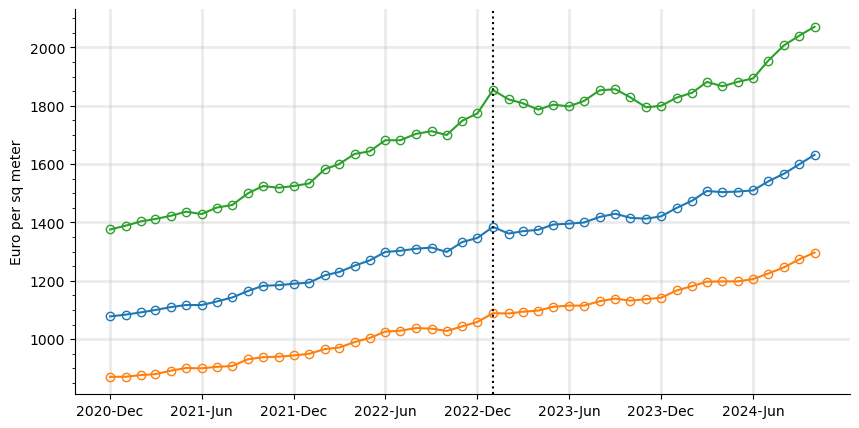

In [27]:
# first plot
fig, ax = plt.subplots(figsize=(10, 5))

cond = df.index >= '2020-12'
sdf = df['apartments']['norte'][cond]

format = dict(marker='o', fillstyle='none')

x, y = sdf.index, sdf['median']
ax.plot(x, y, label='median', **format)

x, y = sdf.index, sdf['q1']
ax.plot(x, y, label='1st quartile', **format)

x, y = sdf.index, sdf['q3']
ax.plot(x, y, label='3rd quartile', **format)

ax.set_ylabel('Euro per sq meter')

ax.set_xticks(x[::6], x.strftime('%Y-%b')[::6])
ax.grid(axis='x')
ax.yaxis.minorticks_on()

ax.axvline(x[-22], c='k', ls=':')

plt.show()